In [1]:
%load_ext autoreload
%autoreload 2

# Minimal access to `.gef` files

In [2]:
import gefslim
import matplotlib.pyplot as plt

In [3]:
PROJ_DIR = "../STT1_image_alignment/pipeline output/result/"

gef = gefslim.GEF(result_dir=PROJ_DIR)

## 04.tissuecut derived data

In [6]:
gef.get_gene_stats(name="C01337B3.gef")

,gene,MIDcount,E10
0,Gm42418,3939830,40.404686
1,Fth1,430715,38.508060
2,Tmsb4x,426657,34.661098
3,Cdk8,398340,34.563690
4,Calm1,323043,35.500229
...,...,...,...
25303,Gm15444,1,0.000000
25304,Gm15412,1,0.000000
25305,Gm15395,1,0.000000
25306,Gm15353,1,0.000000


In [8]:
genecounts_per_spot = gef.get_genecounts_per_spot(name="C01337B3.gef", binsize=10)
genecounts_per_spot

,x,y,gene,counts
0,0,4080,Phactr1,2
1,0,4080,Tmsb4x,2
2,0,4080,Zer1,1
3,0,7100,Hgs,1
4,0,8060,Dnaja4,1
...,...,...,...,...
66694294,26450,16360,Sst,1
66694295,26450,22920,Snx27,1
66694296,26450,23230,Nrgn,1
66694297,26450,24680,Pfn2,1


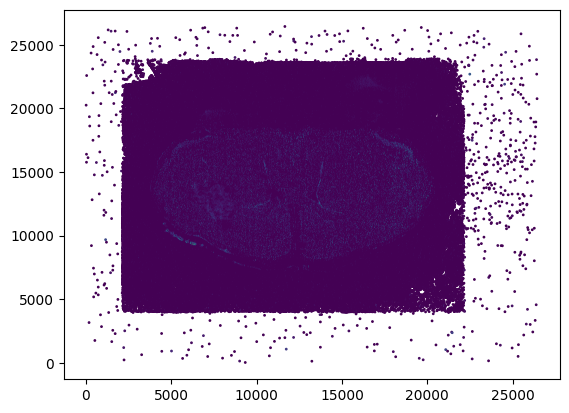

In [9]:
tmp = genecounts_per_spot.query("gene == 'Gm42418'")

plt.scatter(tmp["x"], tmp["y"], c = tmp["counts"], s=1)

## 041.cellcut derived data

In [10]:
gef.get_counts_per_cell(name="C01337B3.cellbin.gef")

/Users/tim.treis/anaconda3/envs/spatialdata/envs/gefslim/lib/python3.10/site-packages/anndata/utils.py:252: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


,cell_id,counts
0,0,9
1,1,51
2,2,102
3,3,48
4,4,35
...,...,...
95062,95062,11
95063,95063,49
95064,95064,70
95065,95065,21


In [11]:
gef.get_genecounts_per_cell(name="C01337B3.cellbin.gef")

,gene,cell_id,counts
0,Agap1,0,3
1,Cdk8,0,1
2,Cirbp,0,1
3,Cpeb3,0,1
4,Cyhr1,0,1
...,...,...,...
13784635,Tagln3,95066,4
13784636,Tmem208,95066,1
13784637,Ubqln2,95066,1
13784638,Uqcc2,95066,1


In [12]:
gef.get_cell_borders(name="C01337B3.cellbin.gef", transformed=False)

/Users/tim.treis/anaconda3/envs/spatialdata/envs/gefslim/lib/python3.10/site-packages/anndata/utils.py:252: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


,cell_id,x,y,border
0,0,13853,7165,"[[5, -7], [-1, -7], [-4, -5], [-6, -5], [-8, -..."
1,1,10235,7398,"[[-6, -1], [-6, 1], [-5, 2], [-5, 3], [-3, 3],..."
2,2,10210,7407,"[[0, -9], [-1, -8], [-3, -8], [-6, -5], [-8, -..."
3,3,10228,7415,"[[4, -7], [2, -7], [1, -8], [-3, -6], [-7, 1],..."
4,4,10165,7421,"[[1, -4], [0, -4], [-1, -3], [-3, -3], [-3, -2..."
...,...,...,...,...
95062,95062,17361,20474,"[[-9, 2], [-9, 3], [9, 3], [8, 0], [6, -2], [4..."
95063,95063,17309,20462,"[[11, -10], [1, -11], [-11, -6], [-12, 4], [-8..."
95064,95064,17363,20446,"[[33, -14], [1, -14], [-5, -9], [-18, -7], [-2..."
95065,95065,17283,20503,"[[-2, -17], [-2, 16], [3, 15], [4, 13], [2, 5]..."


In [13]:
gef.get_cell_borders(name="C01337B3.cellbin.gef", transformed=True)

/Users/tim.treis/anaconda3/envs/spatialdata/envs/gefslim/lib/python3.10/site-packages/anndata/utils.py:252: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


,cell_id,border
0,0,"[[13858, 7158], [13852, 7158], [13849, 7160], ..."
1,1,"[[10229, 7397], [10229, 7399], [10230, 7400], ..."
2,2,"[[10210, 7398], [10209, 7399], [10207, 7399], ..."
3,3,"[[10232, 7408], [10230, 7408], [10229, 7407], ..."
4,4,"[[10166, 7417], [10165, 7417], [10164, 7418], ..."
...,...,...
95062,95062,"[[17352, 20476], [17352, 20477], [17370, 20477..."
95063,95063,"[[17320, 20452], [17310, 20451], [17298, 20456..."
95064,95064,"[[17396, 20432], [17364, 20432], [17358, 20437..."
95065,95065,"[[17281, 20486], [17281, 20519], [17286, 20518..."


In [14]:
gef.get_area_per_cell(name="C01337B3.cellbin.gef")

/Users/tim.treis/anaconda3/envs/spatialdata/envs/gefslim/lib/python3.10/site-packages/anndata/utils.py:252: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


,cell_id,area
0,0,220
1,1,102
2,2,250
3,3,192
4,4,73
...,...,...
95062,95062,107
95063,95063,536
95064,95064,1111
95065,95065,195


In [15]:
adata = gef.read_cellcut(name="C01337B3.cellbin.gef")
adata.to_df()

/Users/tim.treis/anaconda3/envs/spatialdata/envs/gefslim/lib/python3.10/site-packages/anndata/utils.py:252: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


,x,y,offset,geneCount,expCount,dnbCount,area,cellTypeID,clusterID,border
0,13853,7165,0,9,12,9,220,0,1,"[[5, -7], [-1, -7], [-4, -5], [-6, -5], [-8, -..."
1,10235,7398,9,51,67,56,102,0,6,"[[-6, -1], [-6, 1], [-5, 2], [-5, 3], [-3, 3],..."
2,10210,7407,60,102,144,116,250,0,6,"[[0, -9], [-1, -8], [-3, -8], [-6, -5], [-8, -..."
3,10228,7415,162,48,54,51,192,0,6,"[[4, -7], [2, -7], [1, -8], [-3, -6], [-7, 1],..."
4,10165,7421,210,35,45,38,73,0,6,"[[1, -4], [0, -4], [-1, -3], [-3, -3], [-3, -2..."
...,...,...,...,...,...,...,...,...,...,...
95062,17361,20474,13784457,11,18,13,107,0,1,"[[-9, 2], [-9, 3], [9, 3], [8, 0], [6, -2], [4..."
95063,17309,20462,13784468,49,77,57,536,0,11,"[[11, -10], [1, -11], [-11, -6], [-12, 4], [-8..."
95064,17363,20446,13784517,70,110,91,1111,0,11,"[[33, -14], [1, -14], [-5, -9], [-18, -7], [-2..."
95065,17283,20503,13784587,21,29,23,195,0,1,"[[-2, -17], [-2, 16], [3, 15], [4, 13], [2, 5]..."
